# Customer Shopping Dataset - Retail Sales Data
Explore Market Basket Analysis in Istanbul Retail Data; A fictional retail store in Instanbul data analysis on customer and product performance




In [ ]:
#Import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
#Read the data

customer_data= pd.read_csv("/content/customer_shopping_data.csv")
customer_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
#Confirm the size of the dataframe

customer_data.shape

(99457, 10)

In [ ]:
#Check for null values


customer_data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
#Drop row with missing data

customer_data.dropna(axis=0, inplace =True)

From the above, The data  has only 1 missing value in the shopping mall column.  Let us get the data clean and get a quick summary of the dataset.

In [ ]:
customer_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Due to the size of the dataset, I will work  on the dataset in chunks

In [ ]:
#Create a new column that calculates the unit cost of goods using the quantity and price columns

def read_data(file_name, col1, col2):
  data = pd.read_csv(file_name, chunksize=1000)
  new_customer_data = pd.DataFrame()
  for d in data:
    colums = zip(col1, col2)
    colums_list = list(colums)
    new_col = [cols[0] / cols[1] for cols in colums_list]
  return new_col



In [ ]:
customer_data['unit_cost'] = read_data('/content/customer_shopping_data.csv', customer_data['price'], customer_data['quantity'])
customer_data.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,unit_cost
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,300.08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,600.17


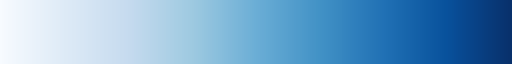

In [ ]:
sns.color_palette("Blues", as_cmap=True)

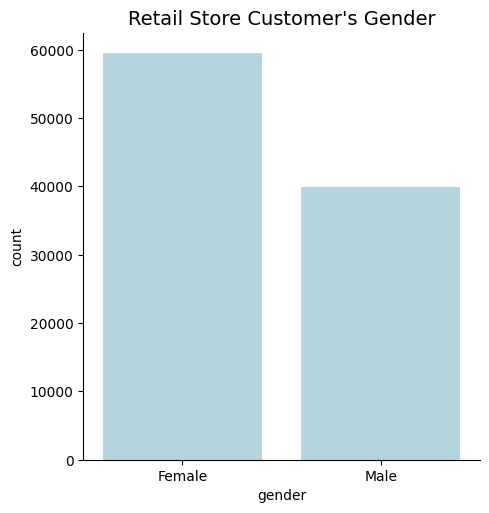

In [ ]:
sns.catplot(x='gender', data=customer_data, kind="count", color="lightBlue")
plt.title("Retail Store Customer's Gender", size=14)
plt.show()

Answer the following questions using plot to explain the answers

### Question 1: What is the most purchased commodity and which commodity do people spend the most money on?

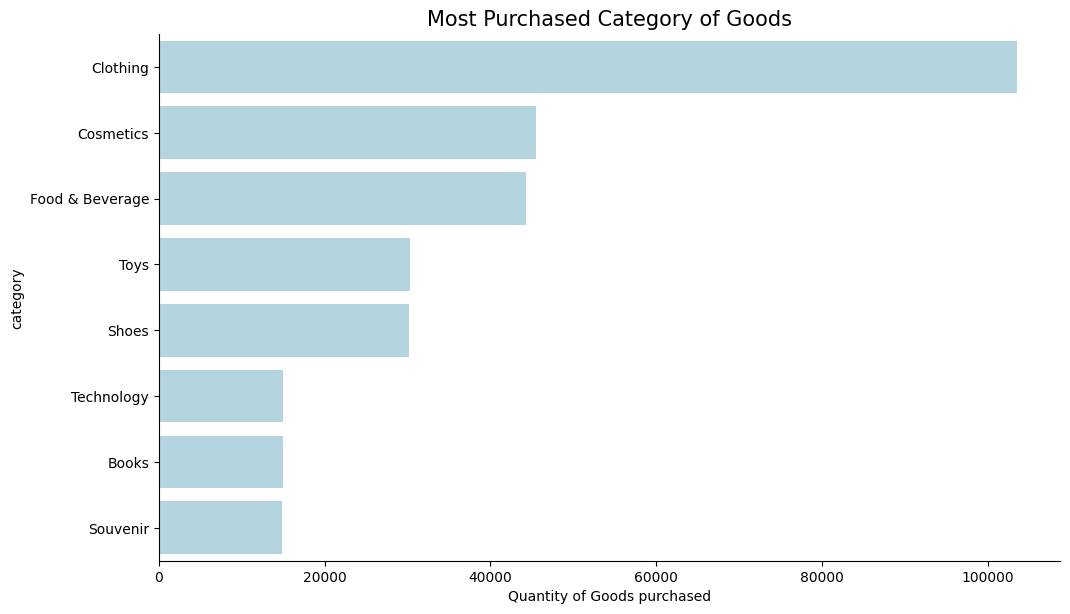


-----------------------------------------------------------------------------------

Most purchased item from the store is Clothing


In [ ]:
Most_purchased_goods = customer_data.groupby(['category'])['quantity'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x='quantity', y='category', kind='bar', data=Most_purchased_goods, color= 'lightblue', height=6, aspect=1.8)
plt.title("Most Purchased Category of Goods", size=15)
plt.xlabel("Quantity of Goods purchased")
plt.show()

print("\n-----------------------------------------------------------------------------------\n")
print(f"Most purchased item from the store is {Most_purchased_goods.iloc[0, 0]}")

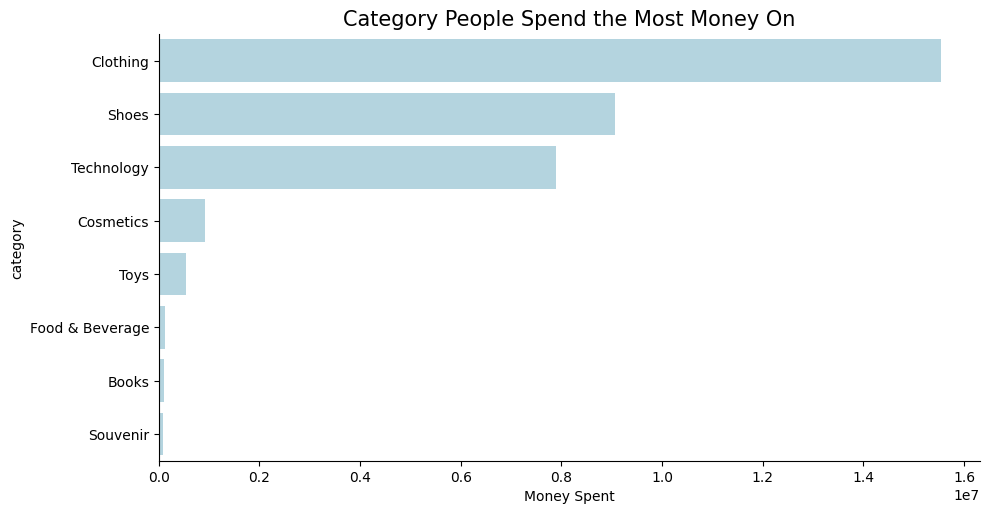

/n--------------------------------------------------------------------------/n
Customers spent the most money buying Clothing 


In [ ]:
most_money_on_goods = customer_data.groupby(['category', 'gender'])['price'].sum().sort_values(ascending=False).reset_index()


sns.catplot( x= 'price', y='category',data= most_money_on_goods, kind='bar', color='lightBlue', errorbar=None, height=5, aspect=2)
plt.title("Category People Spend the Most Money On", size = 15)
plt.xlabel("Money Spent")
plt.show()


print("/n--------------------------------------------------------------------------/n")
print(f"Customers spent the most money buying {most_money_on_goods.iloc[0,0]} ")

### Question: Categorize the things customers spend the most money on based on the gender

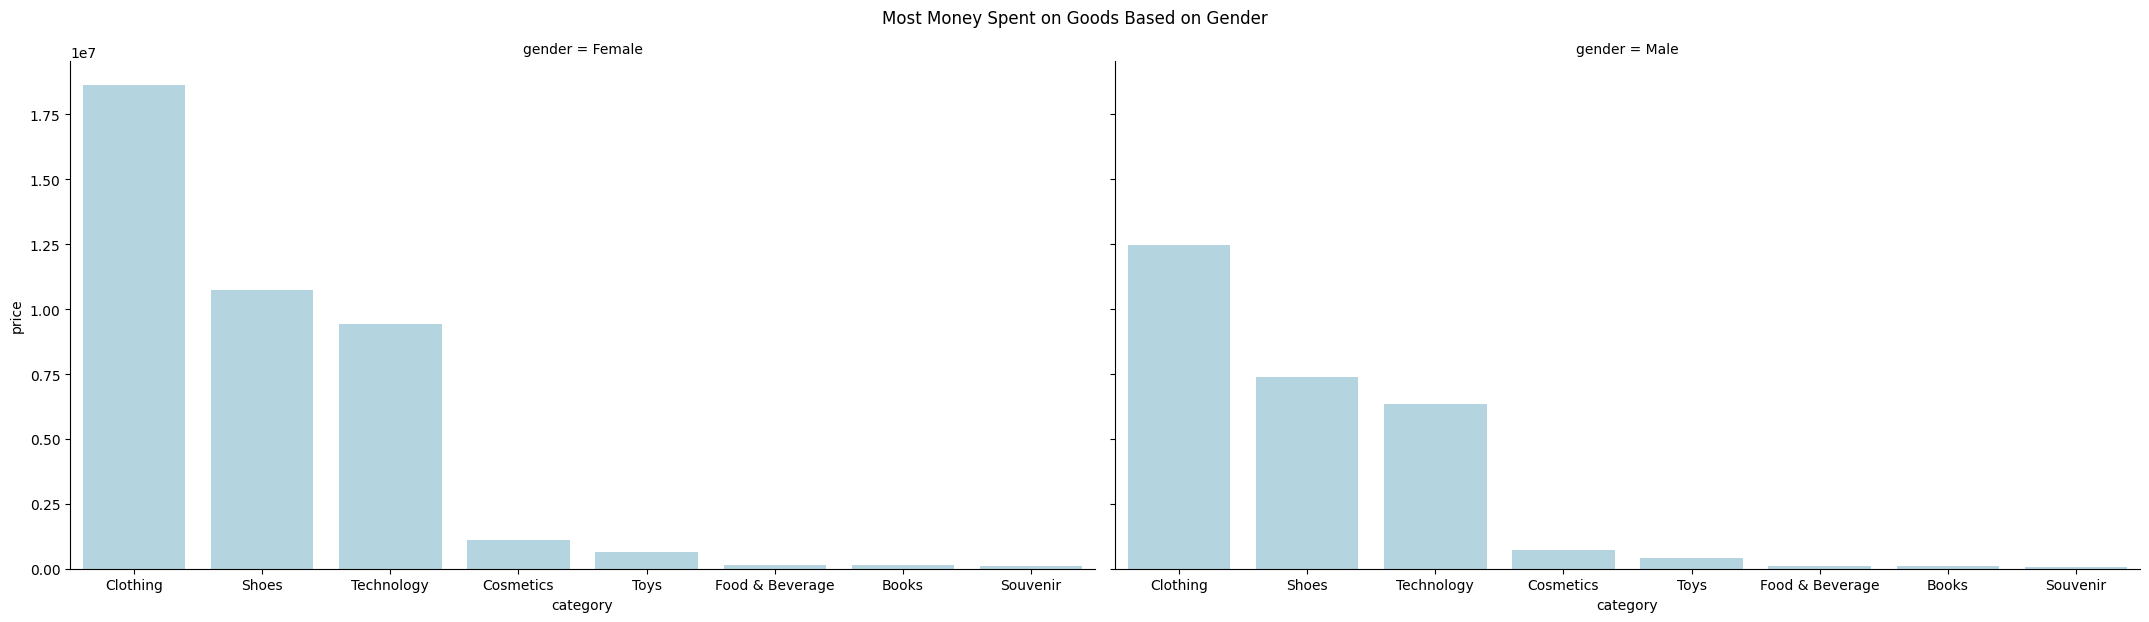

In [ ]:
g  = sns.catplot(x='category', y='price', kind='bar', errorbar=None, data=most_money_on_goods, color='lightblue', col='gender', height=6, aspect=1.8)
g.fig.suptitle("Most Money Spent on Goods Based on Gender", y=1.03)
plt.show()

### Question" Which payment method is the most used?

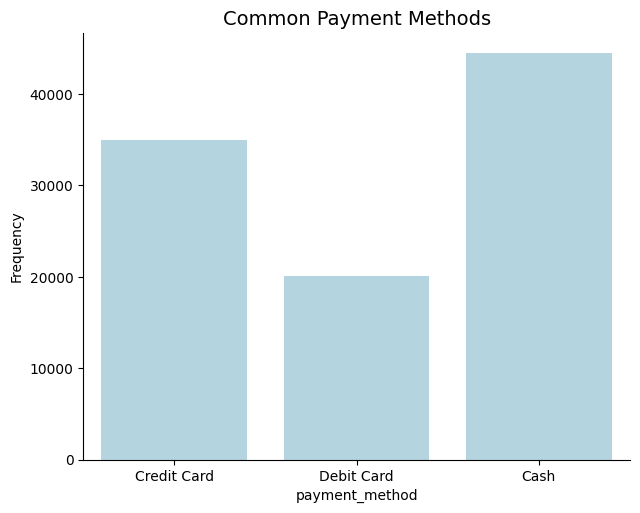

In [ ]:
sns.catplot(kind='count', x='payment_method', data=customer_data, color='lightblue', height=5, aspect= 1.3)
plt.title("Common Payment Methods", size=14)
plt.ylabel("Frequency")
plt.show()

### Question: Which sales outlet has the most number of customers

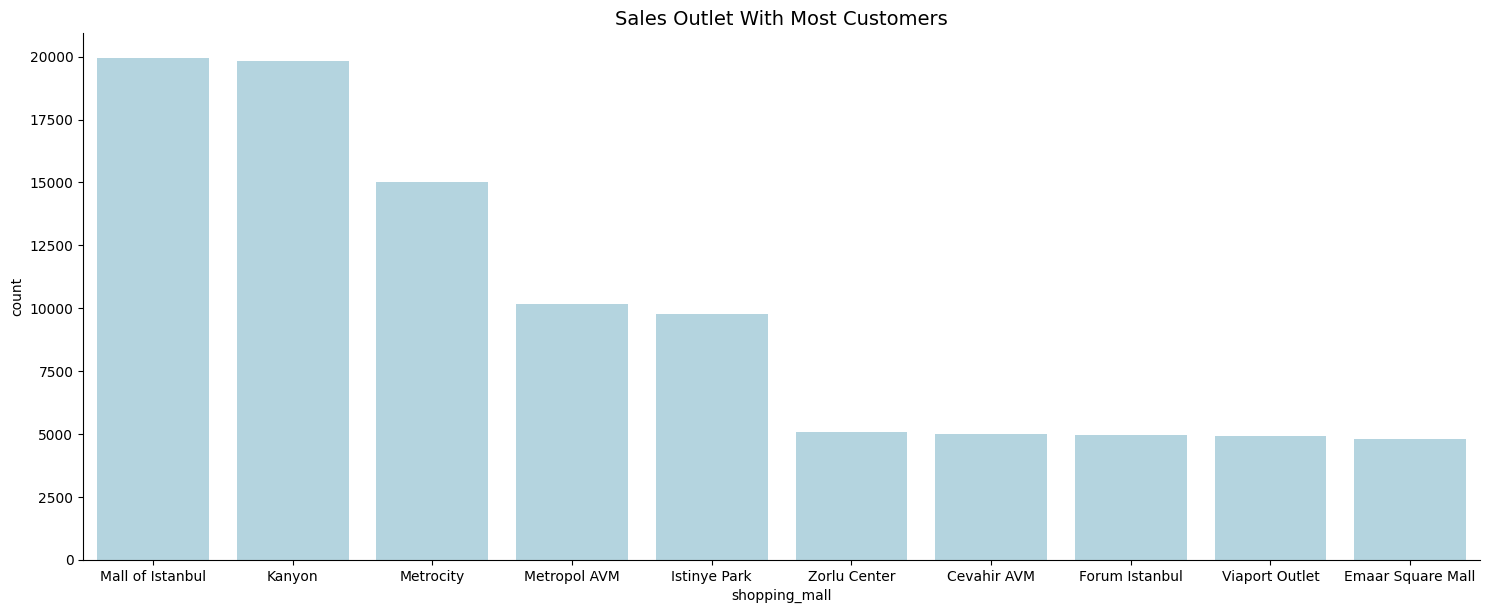

In [ ]:
sns.catplot(kind='count', x='shopping_mall', data=customer_data, color='Lightblue', height=6, aspect= 2.5, order=customer_data['shopping_mall'].value_counts().index)
plt.title("Sales Outlet With Most Customers", size=14)
plt.show()

## Perform a time series analysis. Showing the growth in sales overtime

In [ ]:
customer_data['invoice_date'] = pd.to_datetime(customer_data['invoice_date'])
customer_data['Year'] = customer_data['invoice_date'].dt.year
customer_data['Q'] = customer_data['invoice_date'].dt.quarter
customer_data['Year-Month'] = customer_data['invoice_date'].dt.to_period('M')

customer_data.tail(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,unit_cost,Year,Q,Year-Month
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,5.23,2021,1,2021-03
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,1050.00,2021,1,2021-03
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,2022-10-15,Mall of Istanbul,11.73,2022,4,2022-10


In [ ]:
customer_data['Year-Month'] = customer_data['Year-Month'].dt.strftime('%Y-%m')
customer_data['Year-Month'] = pd.to_datetime(customer_data['Year-Month'])
customer_data['Year-Month'].dtypes

dtype('<M8[ns]')

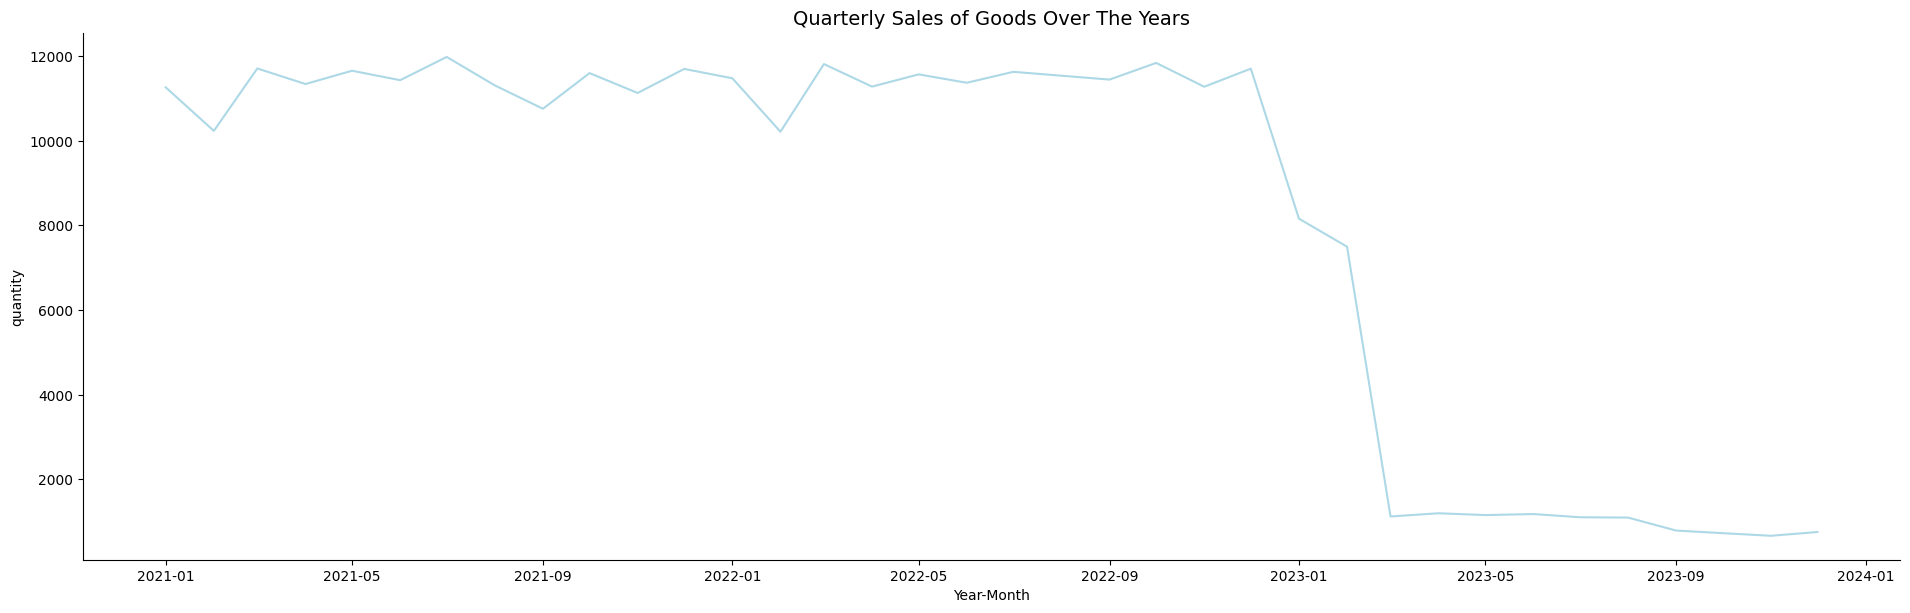

In [ ]:
sales_data = customer_data.groupby(['Year-Month'])['quantity'].sum().reset_index()

sns.relplot(kind="line", x="Year-Month", y="quantity", data=sales_data, color="lightblue", height=6, aspect=3.2)
plt.title("Quarterly Sales of Goods Over The Years", size=14)
plt.show()


The plot above suggest there was a greate decline in sales of goods in the year 2023. Let us plot the year 2023 alone to see clearly the trends.

In [ ]:
sales_data_2023 = customer_data[customer_data['Year']==2023]

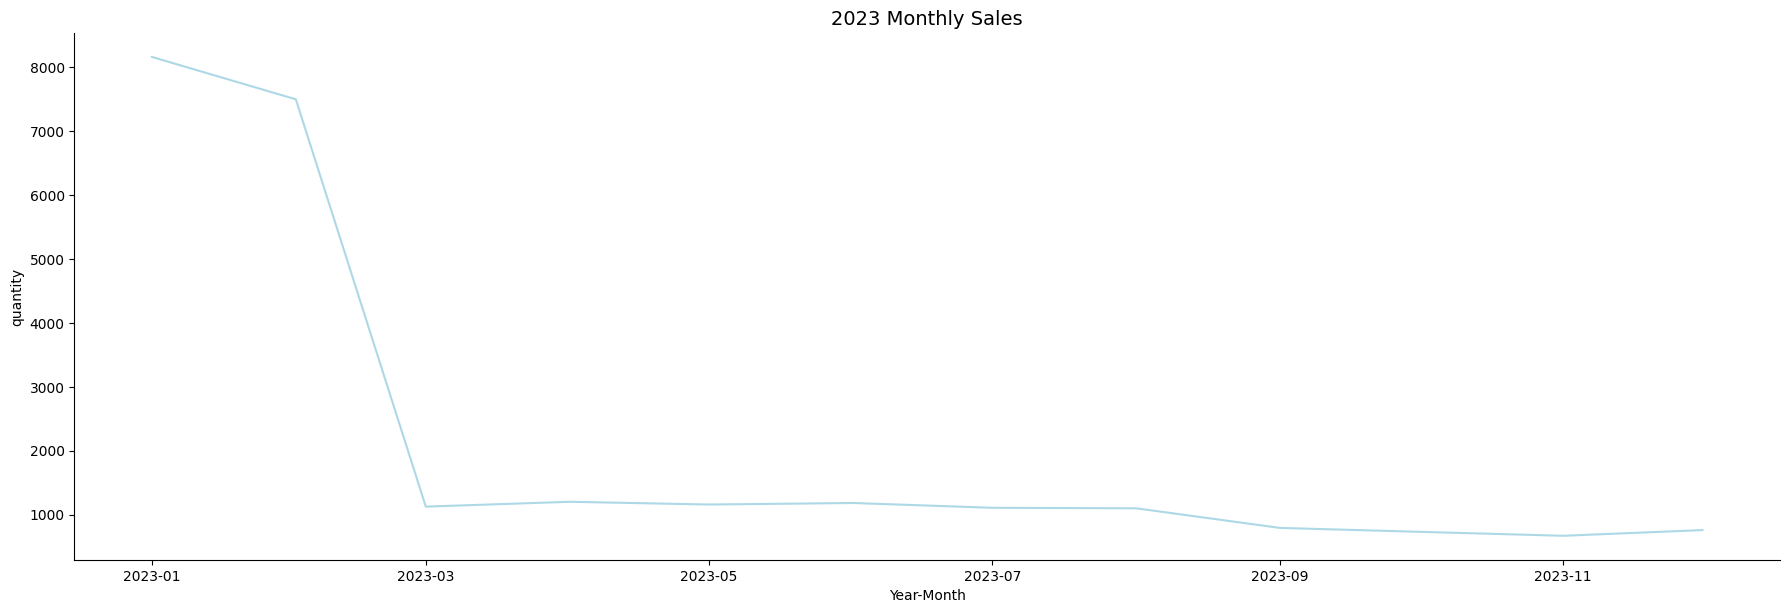

In [ ]:
sales_2023 = sales_data_2023.groupby(['Year-Month'])['quantity'].sum().reset_index()

sns.relplot(kind="line", x="Year-Month", y="quantity", data=sales_2023, color="lightblue", height=6, aspect=3)
plt.title("2023 Monthly Sales", size=14)
plt.show()




Clearly the plot indicates that the decline in sales started in the first quarter. Further investigations would be great to know the reason behind the decline in sales.

#### INSIGHTS:
1. The most widely used payment method is cash
2. Clothing is the  ost sold category and bought category buy all genders. It is also the category poeple spend the most money on
3. Mall of Istanbul has the highest customers while Emaar Square has the least customers
4. There is a decline in sold goods at the beginning or first quarter of every year. However, 2023 Q1 Has the highest decline in quantity of goods sold.



#### RECOMMENDATIONS:
1. Further investigations would be great to know the reason behind the decline in sales.
2. Prioritize seeling of clothings across all sales outlet as customers spend more money on clothings.